# 📊 Comprehensive Analysis: Unemployment vs Crime Rate
This notebook analyzes how unemployment rates influence crime rates across U.S. states using visualizations, statistical tests, and regression.

## 📥 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.weightstats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Load data
from google.colab import files
upload1 = files.upload()
df = pd.read_csv("crimebystatecombinedwithunemployment.csv")

Saving crimebystatecombinedwithunemployment.csv to crimebystatecombinedwithunemployment.csv


In [2]:
df.isnull().sum()

,0
state,0
unemployment,0
year,0
Population,0
violent total,0
Murder,0
rape,0
Robbery,0
Aggravated assault,0
property total,0


## 🧹 2. Prepare and Clean Data

In [3]:
# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Create a new column for total crime (violent + property)
df['total_crime'] = (df['violent_total'] + df['property_total'])

# Drop missing values
df.dropna(inplace=True)

df.head(10)  # Displays the first 10 rows

,state,unemployment,year,population,violent_total,murder,rape,robbery,aggravated_assault,property_total,burglary,larceny_theft,vehicle_theft,total_crime
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3,3808.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7,3712.6
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5,3938.8
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1,4243.8
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2,4933.6
5,AL,10.542,1981,3916000,470.5,11.9,26.1,126.5,306.1,4428.3,1450.7,2693.3,284.2,4898.8
6,AL,14.100,1982,3943000,447.7,10.6,26.0,112.0,299.1,4185.8,1256.2,2656.4,273.3,4633.5
7,AL,13.808,1983,3959000,416.0,9.2,23.5,98.4,284.9,3685.0,1073.1,2381.4,230.5,4101.0
8,AL,11.008,1984,3990000,431.2,9.4,25.1,96.1,300.6,3470.9,1001.8,2235.5,233.6,3902.1
9,AL,9.167,1985,4021000,457.5,9.8,26.8,105.4,315.5,3484.6,1034.9,2191.2,258.5,3942.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               1989 non-null   object 
 1   unemployment        1989 non-null   float64
 2   year                1989 non-null   int64  
 3   population          1989 non-null   int64  
 4   violent_total       1989 non-null   float64
 5   murder              1989 non-null   float64
 6   rape                1989 non-null   float64
 7   robbery             1989 non-null   float64
 8   aggravated_assault  1989 non-null   float64
 9   property_total      1989 non-null   float64
 10  burglary            1989 non-null   float64
 11  larceny_theft       1989 non-null   float64
 12  vehicle_theft       1989 non-null   float64
 13  total_crime         1989 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 217.7+ KB


In [5]:
# Sort and classify states by population
df_sorted = df.sort_values(by='population')
low_states = df_sorted.head(3)['state'].tolist()
high_states = df_sorted.tail(3)['state'].tolist()

# Add population group label
def classify_population_group(row):
    if row['state'] in low_states:
        return 'Low'
    elif row['state'] in high_states:
        return 'High'
    else:
        return 'Medium'

df['population_group'] = df.apply(classify_population_group, axis=1)


df_medium = df[df['population_group'] == 'Medium'].copy()

X_violent = sm.add_constant(df_medium['unemployment'])
y_violent = df_medium['violent_total']
model_violent = sm.OLS(y_violent, X_violent).fit()


X_property = sm.add_constant(df_medium['unemployment'])
y_property = df_medium['property_total']
model_property = sm.OLS(y_property, X_property).fit()

print("Violent Crime model p-value:", f"{model_violent.f_pvalue:.20f}")
print("Property Crime model p-value:", f"{model_property.f_pvalue:.20f}")

Violent Crime model p-value: 0.00000000000003987225
Property Crime model p-value: 0.00000001462944326824


In [6]:
# Step 2: Upload and load the poverty dataset
upload = files.upload()  # Upload hstpov9.csv when prompted

# Load poverty data with specified headers and skip rows
poverty_df = pd.read_csv("hstpov9.csv", header=[4, 5, 6], skiprows=[7])

# Step 3: Flatten multi-level column headers
poverty_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in poverty_df.columns]

# Step 4: Select relevant columns (year and first 'Percent' column as poverty_rate)
percent_cols = [col for col in poverty_df.columns if 'Percent' in col]
poverty_df = poverty_df[['Unnamed: 0_level_0_Unnamed: 0_level_1_2023', percent_cols[0]]]

# Rename columns
poverty_df.columns = ['year', 'poverty_rate']

# Convert 'year' and 'poverty_rate' to numeric, coercing errors to NaN
poverty_df['year'] = pd.to_numeric(poverty_df['year'].str.extract('(\d{4})')[0], errors='coerce')
poverty_df['poverty_rate'] = pd.to_numeric(poverty_df['poverty_rate'], errors='coerce')

# Filter poverty data for 1976 to 2014
poverty_df = poverty_df[poverty_df['year'].between(1976, 2014)].dropna()

# Step 5: Prepare crime data and resolve merge conflicts
if 'poverty_rate' in df.columns:
    df_medium = df_medium.drop(columns=['poverty_rate'])

df_medium = df_medium[df_medium['year'].between(1976, 2014)]

# Step 6: Merge crime and poverty data
df_medium = pd.merge(df_medium, poverty_df, on='year', how='left')

# Step 7: Calculate median poverty rate for 1976–2014
median_poverty = poverty_df['poverty_rate'].median()
print(f"Median poverty rate (1976–2014): {median_poverty}")

# Step 8: Filter for rows where poverty_rate is below median
df_filtered = df_medium[df_medium['poverty_rate'].notna() & (df_medium['poverty_rate'] <= median_poverty)]

# Step 9: Display the filtered data with corrected column names
print("\nFiltered Crime Data (Poverty Rate < Median, 1976–2014):")
print(df_filtered[['state', 'year', 'violent_total', 'property_total', 'poverty_rate']])
print(df_filtered.head(20))

Saving hstpov9.csv to hstpov9.csv
Median poverty rate (1976–2014): 13.45

Filtered Crime Data (Poverty Rate < Median, 1976–2014):
     state  year  violent_total  property_total  poverty_rate
0       AL  1976          388.8          3419.5          11.8
1       AL  1977          414.4          3298.2          11.6
2       AL  1978          419.1          3519.7          11.4
3       AL  1979          413.3          3830.5          11.7
4       AL  1980          448.5          4485.1          13.0
...    ...   ...            ...             ...           ...
1908    WI  2004          209.8          2665.7          12.7
1909    WI  2005          242.0          2669.0          12.6
1910    WI  2006          286.1          2821.0          12.3
1911    WI  2007          291.5          2843.9          12.5
1912    WI  2008          275.5          2762.2          13.2

[960 rows x 5 columns]
   state  unemployment  year  population  violent_total  murder  rape  \
0     AL         6.808  1976 

## 📊 3. Descriptive Statistics

In [7]:
print("\nDescriptive Statistics:\n", df[['unemployment', 'violent_total', 'property_total','total_crime']].describe())

# Outlier detection with z-scores
df_filtered['unemployment_z'] = stats.zscore(df_filtered['unemployment'])
df_filtered['violent_z'] = stats.zscore(df_filtered['violent_total'])
df_filtered['property_z'] = stats.zscore(df_filtered['property_total'])
df_filtered['crime_rate_z'] = stats.zscore(df_filtered['total_crime'])

# Outliers
print("\nUnemployment Outliers (|z| > 3):", df_filtered[np.abs(df_filtered['unemployment_z']) > 3].shape[0])
print("Violent Crime Outliers (|z| > 3):", df_filtered[np.abs(df_filtered['violent_z']) > 3].shape[0])
print("Property Crime Outliers (|z| > 3):", df_filtered[np.abs(df_filtered['property_z']) > 3].shape[0])
print("Crime Rate Outliers (|z| > 3):", df_filtered[np.abs(df_filtered['crime_rate_z']) > 3].shape[0])


Descriptive Statistics:
        unemployment  violent_total  property_total   total_crime
count   1989.000000    1989.000000     1989.000000   1989.000000
mean       6.127662     464.795676     4014.478331   4479.274007
std        2.080686     295.760230     1270.984536   1475.144482
min        2.300000      47.000000     1524.400000   1623.700000
25%        4.617000     275.500000     3043.100000   3388.000000
50%        5.800000     412.300000     3919.500000   4320.200000
75%        7.325000     590.000000     4758.200000   5350.500000
max       17.825000    2921.800000     9512.100000  12173.500000

Unemployment Outliers (|z| > 3): 7
Violent Crime Outliers (|z| > 3): 20
Property Crime Outliers (|z| > 3): 8
Crime Rate Outliers (|z| > 3): 9


<ipython-input-7-a267f2e74059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['unemployment_z'] = stats.zscore(df_filtered['unemployment'])
<ipython-input-7-a267f2e74059>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['violent_z'] = stats.zscore(df_filtered['violent_total'])
<ipython-input-7-a267f2e74059>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

## 📈 4. Visualizations

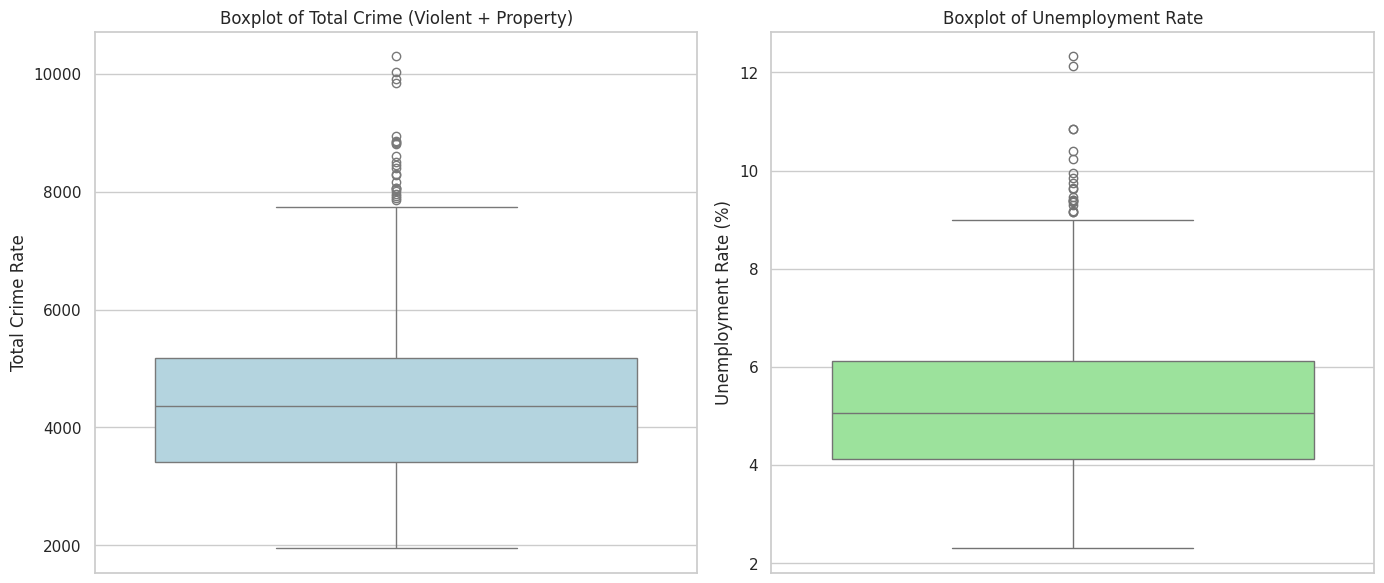

In [8]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for total crime
sns.boxplot(y=df_filtered['total_crime'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Total Crime (Violent + Property)')
axes[0].set_ylabel('Total Crime Rate')

# Boxplot for unemployment
sns.boxplot(y=df_filtered['unemployment'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Unemployment Rate')
axes[1].set_ylabel('Unemployment Rate (%)')

plt.tight_layout()
plt.show()

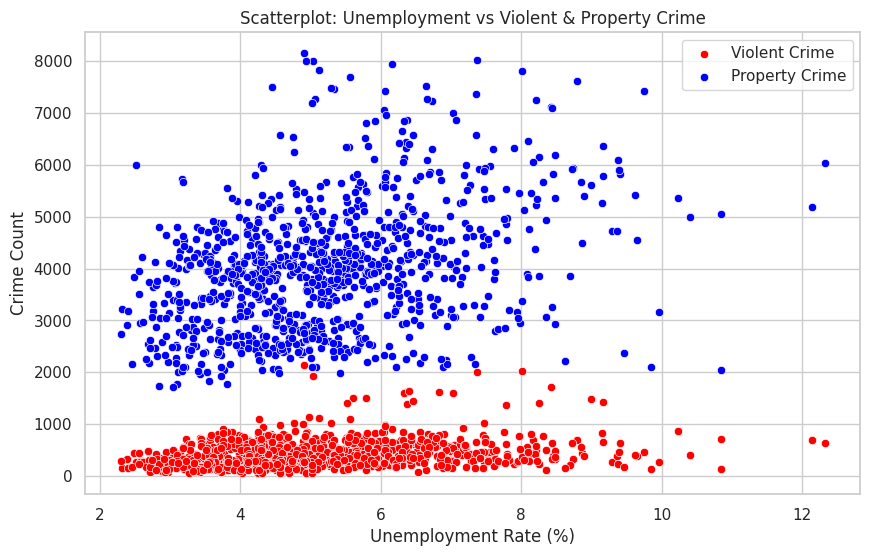

In [9]:
# 🔹 1. Scatterplot: Unemployment vs Violent and Property Crime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='unemployment', y='violent_total', label='Violent Crime', color='red')
sns.scatterplot(data=df_filtered, x='unemployment', y='property_total', label='Property Crime', color='blue')
plt.title('Scatterplot: Unemployment vs Violent & Property Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

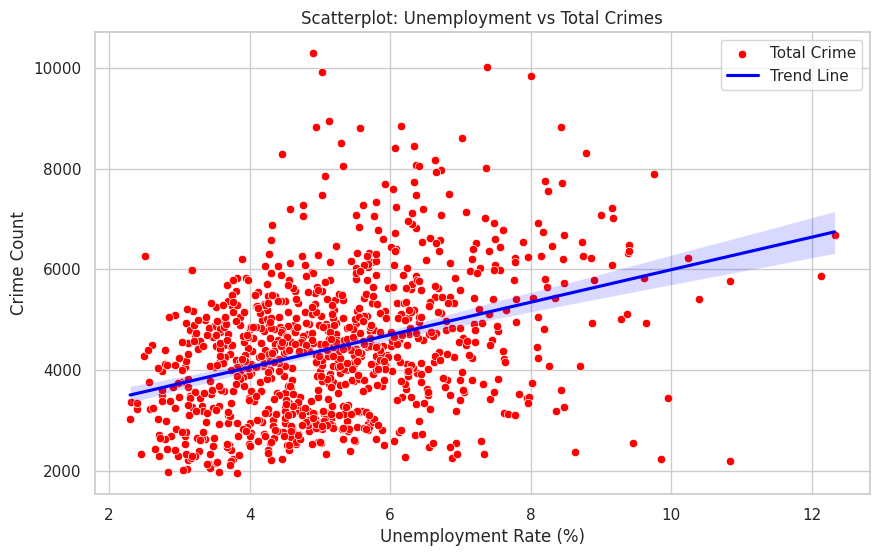

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='unemployment', y='total_crime', label='Total Crime', color='red')
sns.regplot(data=df_filtered, x='unemployment', y='total_crime', scatter=False, color='blue', label='Trend Line')
plt.title('Scatterplot: Unemployment vs Total Crimes')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

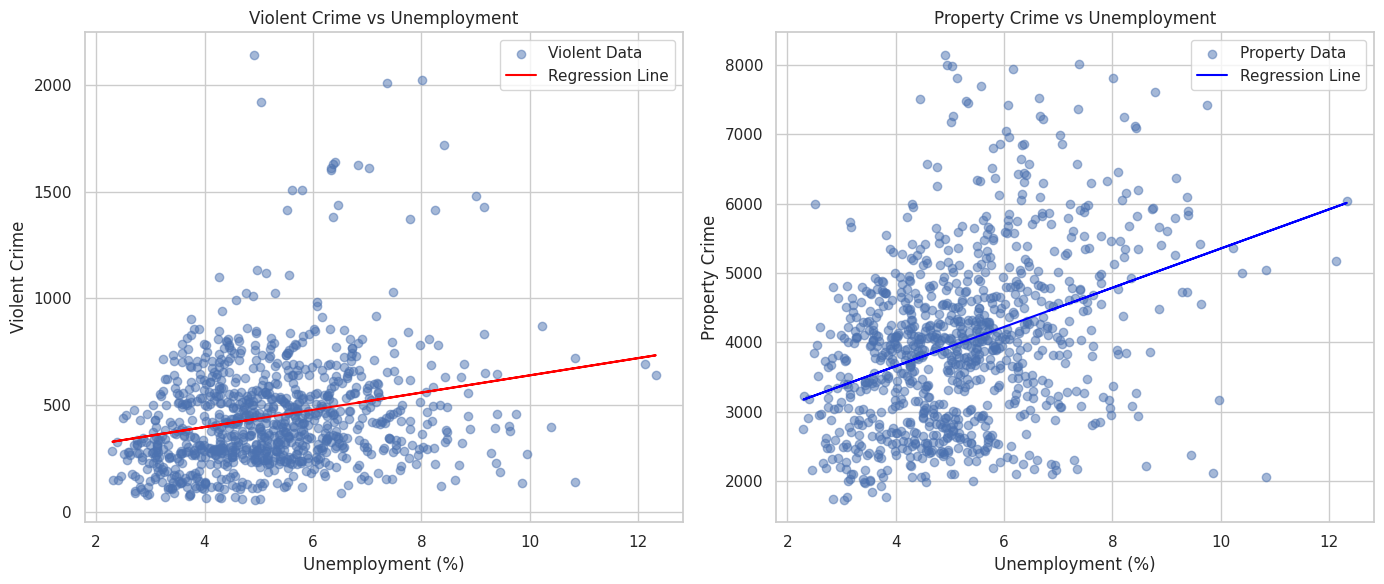

In [11]:
# 🔹 2. Simple Linear Regression Lines (separate)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Violent Crime
X = df_filtered[['unemployment']]
y_v = df_filtered['violent_total']
model_v = LinearRegression().fit(X, y_v)
y_pred_v = model_v.predict(X)
ax[0].scatter(df_filtered['unemployment'], y_v, alpha=0.5, label='Violent Data')
ax[0].plot(df_filtered['unemployment'], y_pred_v, color='red', label='Regression Line')
ax[0].set_title('Violent Crime vs Unemployment')
ax[0].set_xlabel('Unemployment (%)')
ax[0].set_ylabel('Violent Crime')
ax[0].legend()
ax[0].grid(True)

# Property Crime
y_p = df_filtered['property_total']
model_p = LinearRegression().fit(X, y_p)
y_pred_p = model_p.predict(X)
ax[1].scatter(df_filtered['unemployment'], y_p, alpha=0.5, label='Property Data')
ax[1].plot(df_filtered['unemployment'], y_pred_p, color='blue', label='Regression Line')
ax[1].set_title('Property Crime vs Unemployment')
ax[1].set_xlabel('Unemployment (%)')
ax[1].set_ylabel('Property Crime')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

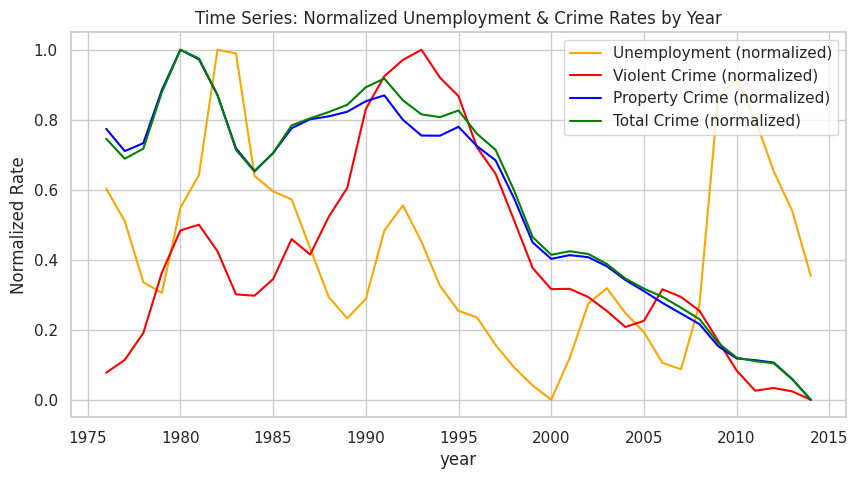

In [12]:
# 🔹 3. Time Series Plot by Year
yearly = df.groupby('year').agg({'unemployment': 'mean', 'violent_total': 'mean', 'property_total': 'mean', 'total_crime': 'mean'}).reset_index()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(yearly[['unemployment', 'violent_total', 'property_total', 'total_crime']])
yearly_scaled = pd.DataFrame(scaled, columns=['unemployment', 'violent_total', 'property_total', 'total_crime'])
yearly_scaled['year'] = yearly['year']

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_scaled, x='year', y='unemployment', label='Unemployment (normalized)', color='orange')
sns.lineplot(data=yearly_scaled, x='year', y='violent_total', label='Violent Crime (normalized)', color='red')
sns.lineplot(data=yearly_scaled, x='year', y='property_total', label='Property Crime (normalized)', color='blue')
sns.lineplot(data=yearly_scaled, x='year', y='total_crime', label='Total Crime (normalized)', color='green')
plt.title('Time Series: Normalized Unemployment & Crime Rates by Year')
plt.ylabel('Normalized Rate')
plt.grid(True)
plt.legend()
plt.show()

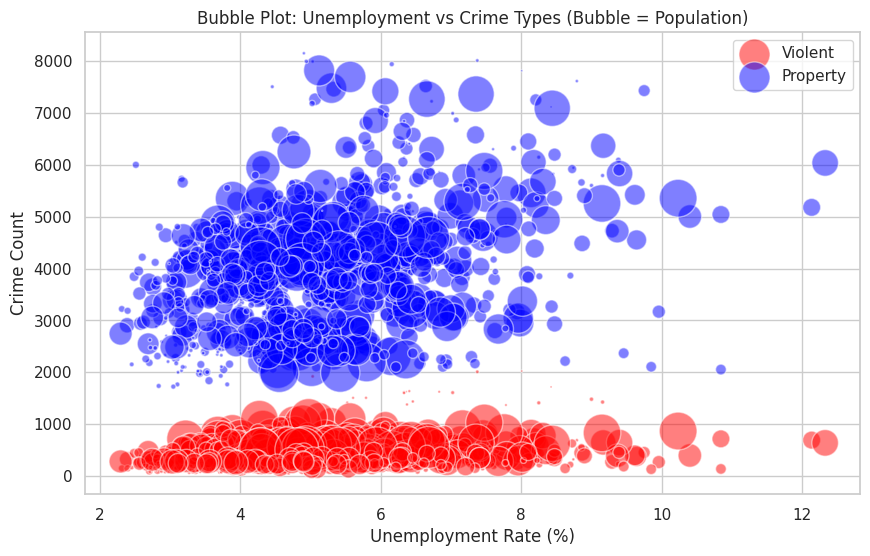

In [13]:
# 🔹 4. Bubble Plot: Add Population Dimension
plt.figure(figsize=(10, 6))
sizes = (df_filtered['population'] - df_filtered['population'].min()) / (df_filtered['population'].max() - df_filtered['population'].min()) * 1000
plt.scatter(df_filtered['unemployment'], df_filtered['violent_total'], s=sizes, alpha=0.5, c='red', edgecolors='w', label='Violent')
plt.scatter(df_filtered['unemployment'], df_filtered['property_total'], s=sizes, alpha=0.5, c='blue', edgecolors='w', label='Property')
plt.title('Bubble Plot: Unemployment vs Crime Types (Bubble = Population)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

For Violent Crime:
H₀ (null): There is no difference in violent crime rates between high and low unemployment groups.

H₁ (alt): There is a significant difference in violent crime rates between the groups.

For Property Crime:
H₀ (null): There is no difference in property crime rates between high and low unemployment groups.

H₁ (alt): There is a significant difference in property crime rates between the groups.

We will make the follwing tests to reject both Null Hypotheses


## 📌 5. Pearson Correlation

In [14]:
# Calculate Pearson correlation coefficients
r_v, p_v = stats.pearsonr(df_filtered['unemployment'], df_filtered['violent_total'])
r_p, p_p = stats.pearsonr(df_filtered['unemployment'], df_filtered['property_total'])
r_c, p_c = stats.pearsonr(df_filtered['unemployment'], df_filtered['total_crime'])

# Function to determine correlation strength based on absolute r value
def correlation_strength(r):
    r_abs = abs(r)
    if 0 <= r_abs <= 0.2:
        return "Very weak"
    elif 0.2 < r_abs <= 0.4:
        return "Weak"
    elif 0.4 < r_abs <= 0.6:
        return "Moderate"
    elif 0.6 < r_abs <= 0.8:
        return "Strong"
    elif 0.8 < r_abs <= 1.0:
        return "Very strong"

# Print results with correlation strength
print(f"Violent Crime: r = {r_v:.4f}, p = {p_v:.20f}, Strength: {correlation_strength(r_v)}")
print(f"Property Crime: r = {r_p:.4f}, p = {p_p:.20f}, Strength: {correlation_strength(r_p)}")
print(f"Crime Rate: r = {r_c:.4f}, p = {p_c:.20f}, Strength: {correlation_strength(r_c)}")

Violent Crime: r = 0.2352, p = 0.00000000000015599309, Strength: Weak
Property Crime: r = 0.3610, p = 0.00000000000000000000, Strength: Weak
Crime Rate: r = 0.3613, p = 0.00000000000000000000, Strength: Weak


## 🧪 6. Hypothesis Test: T-test

In [15]:
median_unemp = df_filtered['unemployment'].median()
high = df_filtered[df_filtered['unemployment'] > median_unemp]
low = df_filtered[df_filtered['unemployment'] <= median_unemp]
t_stat_v, p_val_v, _ = ttest_ind(high['violent_total'], low['violent_total'])
t_stat_p, p_val_p, _ = ttest_ind(high['property_total'], low['property_total'])
t_stat_c, p_val_c, _ = ttest_ind(high['total_crime'], low['total_crime'])
print(f"Violent Crime T-test: t = {t_stat_v:.4f}, p = {p_val_v:.20f}")
print(f"Property Crime T-test: t = {t_stat_p:.4f}, p = {p_val_p:.20f}")
print(f"Crime Rate T-test: t = {t_stat_c:.4f}, p = {p_val_c:.20f}")

Violent Crime T-test: t = 5.8177, p = 0.00000000812826252859
Property Crime T-test: t = 9.7012, p = 0.00000000000000000000
Crime Rate T-test: t = 9.6411, p = 0.00000000000000000000


7. Linear Regression Analysis

In [16]:
# --- Violent Crime Regression ---
X_violent = sm.add_constant(df_filtered['unemployment'])
y_violent = df_filtered['violent_total']
model_violent = sm.OLS(y_violent, X_violent).fit()

# --- Property Crime Regression ---
X_property = sm.add_constant(df_filtered['unemployment'])
y_property = df_filtered['property_total']
model_property = sm.OLS(y_property, X_property).fit()

# --- Total Crime rate Regression ---
X_total = sm.add_constant(df_filtered['unemployment'])
y_total = df_filtered['total_crime']
model_total = sm.OLS(y_total, X_total).fit()


def interpret_model(model, crime_type):
    intercept = model.params['const']
    coef = model.params['unemployment']
    p_val = model.pvalues['unemployment']
    r_squared = model.rsquared

    significance = "< 0.001" if p_val < 0.001 else round(p_val, 4)
    reject_null = p_val < 0.05

    print(f"### {crime_type} vs Unemployment")
    print(f"- Intercept (const): {intercept:.2f}")
    print(f"- Unemployment coefficient: {coef:.2f}")
    print(f"- p-value: {significance} ✅ statistically significant" if reject_null else f"- p-value: {significance} ❌ not significant")
    print(f"- R² = {r_squared:.3f} → Unemployment explains {r_squared*100:.1f}% of the variance in {crime_type.lower()} rates")
    print(f"- Interpretation: For each 1% increase in unemployment, {crime_type.lower()} increases by about {coef:.1f} incidents per 100,000 people")
    print(f"- Hypothesis test: We {'reject' if reject_null else 'fail to reject'} the null hypothesis.\n")

interpret_model(model_violent, "Violent Crime")
interpret_model(model_property, "Property Crime")
interpret_model(model_total, "Total Crime")

### Violent Crime vs Unemployment
- Intercept (const): 234.05
- Unemployment coefficient: 40.42
- p-value: < 0.001 ✅ statistically significant
- R² = 0.055 → Unemployment explains 5.5% of the variance in violent crime rates
- Interpretation: For each 1% increase in unemployment, violent crime increases by about 40.4 incidents per 100,000 people
- Hypothesis test: We reject the null hypothesis.

### Property Crime vs Unemployment
- Intercept (const): 2522.39
- Unemployment coefficient: 283.11
- p-value: < 0.001 ✅ statistically significant
- R² = 0.130 → Unemployment explains 13.0% of the variance in property crime rates
- Interpretation: For each 1% increase in unemployment, property crime increases by about 283.1 incidents per 100,000 people
- Hypothesis test: We reject the null hypothesis.

### Total Crime vs Unemployment
- Intercept (const): 2756.44
- Unemployment coefficient: 323.53
- p-value: < 0.001 ✅ statistically significant
- R² = 0.131 → Unemployment explains 13.1% of the vari

## 📏 7. Confidence Interval

In [17]:
conf_v = stats.t.interval(0.95, len(df_filtered)-1, loc=df_filtered['violent_total'].mean(), scale=stats.sem(df_filtered['violent_total']))
conf_p = stats.t.interval(0.95, len(df_filtered)-1, loc=df_filtered['property_total'].mean(), scale=stats.sem(df_filtered['property_total']))
conf_c = stats.t.interval(0.95, len(df_filtered)-1, loc=df_filtered['total_crime'].mean(), scale=stats.sem(df_filtered['total_crime']))
print(f"\n95% CI for Violent Crime: ({conf_v[0]:.4f}, {conf_v[1]:.4f})")
print(f"95% CI for Property Crime: ({conf_p[0]:.4f}, {conf_p[1]:.4f})")
print(f"95% CI for Crime Rate: ({conf_c[0]:.4f}, {conf_c[1]:.4f})")


95% CI for Violent Crime: (428.4579, 462.1984)
95% CI for Property Crime: (3925.2341, 4079.1913)
95% CI for Crime Rate: (4359.6459, 4535.4357)


In [19]:
import pandas as pd
from google.colab import files

# Step 2: Upload and load the poverty dataset
upload = files.upload()  # Upload hstpov9.csv when prompted

# Load poverty data with specified headers and skip rows
poverty_df = pd.read_csv("hstpov9.csv", header=[4, 5, 6], skiprows=[7])

# Step 3: Flatten multi-level column headers
poverty_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in poverty_df.columns]

# Step 4: Select relevant columns (year and first 'Percent' column as poverty_rate)
percent_cols = [col for col in poverty_df.columns if 'Percent' in col]
poverty_df = poverty_df[['Unnamed: 0_level_0_Unnamed: 0_level_1_2023', percent_cols[0]]]

# Rename columns
poverty_df.columns = ['year', 'poverty_rate']

# Convert 'year' and 'poverty_rate' to numeric, coercing errors to NaN
poverty_df['year'] = pd.to_numeric(poverty_df['year'].str.extract('(\d{4})')[0], errors='coerce')
poverty_df['poverty_rate'] = pd.to_numeric(poverty_df['poverty_rate'], errors='coerce')

# Filter poverty data for 1976 to 2014
poverty_df = poverty_df[poverty_df['year'].between(1976, 2014)].dropna()

# Step 5: Prepare crime data and resolve merge conflicts
if 'poverty_rate' in df.columns:
    df = df.drop(columns=['poverty_rate'])
df = df[df['year'].between(1976, 2014)]

# Step 6: Merge crime and poverty data
df = pd.merge(df, poverty_df, on='year', how='left')

# Step 7: Calculate median poverty rate for 1976–2014
median_poverty = poverty_df['poverty_rate'].median()
print(f"Median poverty rate (1976–2014): {median_poverty}")

# Step 8: Filter for rows where poverty_rate is below median
df_filtered = df[df['poverty_rate'].notna() & (df['poverty_rate'] < median_poverty)]

# Step 9: Display the filtered data with corrected column names
print("\nFiltered Crime Data (Poverty Rate < Median, 1976–2014):")
print(df_filtered[['state', 'year', 'violent_total', 'property_total', 'poverty_rate']])
print(df_filtered.head(20))

Saving hstpov9.csv to hstpov9 (1).csv
Median poverty rate (1976–2014): 13.45

Filtered Crime Data (Poverty Rate < Median, 1976–2014):
     state  year  violent_total  property_total  poverty_rate
0       AL  1976          388.8          3419.5          11.8
1       AL  1977          414.4          3298.2          11.6
2       AL  1978          419.1          3519.7          11.4
3       AL  1979          413.3          3830.5          11.7
4       AL  1980          448.5          4485.1          13.0
...    ...   ...            ...             ...           ...
2028    WY  2004          229.9          3338.5          12.7
2029    WY  2005          230.0          3158.0          12.6
2030    WY  2006          253.8          2986.6          12.3
2031    WY  2007          257.1          2879.1          12.5
2032    WY  2008          249.7          2725.0          13.2

[1020 rows x 5 columns]
   state  unemployment  year  population  violent_total  murder  rape  \
0     AL         6.808  

In [20]:
import pandas as pd
import statsmodels.api as sm

# Load Gini index data
gini_df = pd.read_csv("SIPOVGINIUSA.csv")
gini_df['year'] = pd.to_datetime(gini_df['observation_date']).dt.year
gini_df = gini_df.rename(columns={'SIPOVGINIUSA': 'gini_index'})

# Sample crime and unemployment data
crime_df = pd.DataFrame({
    'year': [1963, 1964, 1965, 1966, 1967],
    'violent_crime_rate': [160, 165, 170, 180, 190],
    'property_crime_rate': [2200, 2250, 2300, 2400, 2500],
    'unemployment_rate': [5.5, 5.0, 4.8, 4.5, 4.3]
})
crime_df['total_crime_rate'] = crime_df['violent_crime_rate'] + crime_df['property_crime_rate']

# Merge datasets on year
df = pd.merge(crime_df, gini_df[['year', 'gini_index']], on='year')

# Prepare regression
X = df[['unemployment_rate', 'gini_index']]
X = sm.add_constant(X)
y = df['total_crime_rate']

# Fit model
model = sm.OLS(y, X).fit()

# Print only the overall model p-value
print("Overall model p-value:", model.f_pvalue)


FileNotFoundError: [Errno 2] No such file or directory: 'SIPOVGINIUSA.csv'

In [ ]:
poverty_df = pd.read_csv("United-States-Poverty-Rate-Percent-Under-US-550-Per-Day-2025-05-24-03-18.csv")
poverty_df = poverty_df.rename(columns={"Unnamed: 0": "year", "Poverty Rate": "poverty_rate"})

# Example simulated data — replace with your actual file
crime_df = pd.DataFrame({
    'year': [1963, 1964, 1965, 1966, 1967],
    'violent_crime_rate': [160, 165, 170, 180, 190],
    'unemployment_rate': [5.5, 5.0, 4.8, 4.5, 4.3]
})

# Merge both datasets on 'year'
df_combined = pd.merge(crime_df, poverty_df, on='year')

# Multiple linear regression
X = df_combined[['unemployment_rate', 'poverty_rate']]
X = sm.add_constant(X)
y = df_combined['violent_crime_rate']
model = sm.OLS(y, X).fit()

# Print p-values
print(model.pvalues)

const                0.010982
unemployment_rate    0.222335
poverty_rate         0.872313
dtype: float64


## ✅ 8. Conclusion

In [ ]:
print("\nConclusion:")
if p_v < 0.05:
    print("There is a significant relationship between unemployment and violent crime.")
else:
    print("No significant relationship between unemployment and violent crime.")

if p_p < 0.05:
    print("There is a significant relationship between unemployment and property crime.")
else:
    print("No significant relationship between unemployment and property crime.")




Conclusion:
There is a significant relationship between unemployment and violent crime.
There is a significant relationship between unemployment and property crime.
